In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# DSCI_GROUP_13_FINAL_PROJECT

## Introduction
### Background
The intersection of video games and research presents unique opportunities for data collection and analysis. At the University of British Columbia, a research group in Computer Science led by Frank Wood has established a dedicated Minecraft server to collect data on player behavior and interactions within the virtual environment. This innovative approach allows researchers to gather authentic data about player engagement patterns, decision-making processes, and social interactions within the gaming ecosystem.

### Research Question
This project seeks to address the following question: **Does playing time affect newsletter subscription rates, and does this relationship vary by age?** 
Specifically, we aim to understand whether the amount of time users spend engaged with the platform influences their likelihood to subscribe to newsletters, and how this relationship might be moderated by age.

### Observations and Variables
As shown in the tables below we can see that:

In the player dataset, there are **196** observations, and **7** variables:
- **experience**<chr>: The level of experience of the player.
- **subscribe**<lgl>: Whether the player is subscribed is represented in the type boolean.
- **hashedEmail**<chr>: The hashed email of the player.
- **played_hours**<dbl>:The number of hours played is represented in the type double.
- **name**<chr>: The name of the player.
- **gender**<chr>: The gender of the player.
- **Age**<dbl>: The age of the player.

In the sessions dataset, there are **1535** observations, and **5** variables:
- **hasedEmail**<chr>: the encrypted email of the player.
- **start_time**<chr>: the start time of the session.
- **end_time<chr>**:The end time of the session.
- **original_start_time**<dbl>: The time passed since the start of the project when the session started.
- **original_end_time**<dbl>: The time passed since the start of the project when the session ended.
 
### Summary statistics
In the **player** dataset we can see that:
- **Mean age**: 20.52062
- **Max age**: 50
- **Min age**: 8
- **Mean played hours**: 5.845918
- **Max played hours**: 223.1
- **Min played hours**: 0

### Issues
- Start time and end_time in the sessions dataset have the year, month, date, and hours in one variable.
- The original_start_time and original_end_time are in a very small unkown unit.
- The name of variable Age and hashedEmail is in a different format then the other variables in the player dataset.
- There might be NA values in the dataset.

In [2]:
players <- read_csv("https://raw.githubusercontent.com/AndyHuang36888/GroupProjectDSCI100/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/AndyHuang36888/GroupProjectDSCI100/refs/heads/main/sessions.csv")


# tidy data
colnames(players) <-c("experience", "subscribe", "hashed_email", "played_hours", "name", "gender","age")
colnames(sessions) <-c("hashed_email", "start_time", "end_time", "original_start_time","original_end_time")

players_stats <- players|>
                 select(age, played_hours)

players_mean <- map_df(players_stats, mean, na.rm = TRUE)            
players_max <- map_df(players_stats, max, na.rm = TRUE)
players_min <- map_df(players_stats, min, na.rm = TRUE)
players_summary <- bind_cols(players_mean, players_max) |>
                   bind_cols(players_min)
colnames(players_summary) <- c("mean_age", "mean_played_hours", "max_age", "max_played_hours", "min_age", "min_played_hours")
players_summary
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `age` -> `age...1`
• `played_hours` -> `played_hours...2`
• `age` -> `age...3`
• `played_hours` -> `played_hours...4`
New names:
• `age` -> `age...5`
• `played_hours` -> `played_hours...6`


mean_age,mean_played_hours,max_age,max_played_hours,min_age,min_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.52062,5.845918,50,223.1,8,0


experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In order to make the analysis, we will perform the **K-nearest-neighbours** to build a model that can try to predict if the player is subscribed to a game newsletter with these variables.
Among these variables, the player's experience is the type string, we will need to convert it to a numeric value if we want to use it as a predictor.

# Methods & Results
Below are some visualizations of the data and the relationship of selected predictors.

Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 10 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


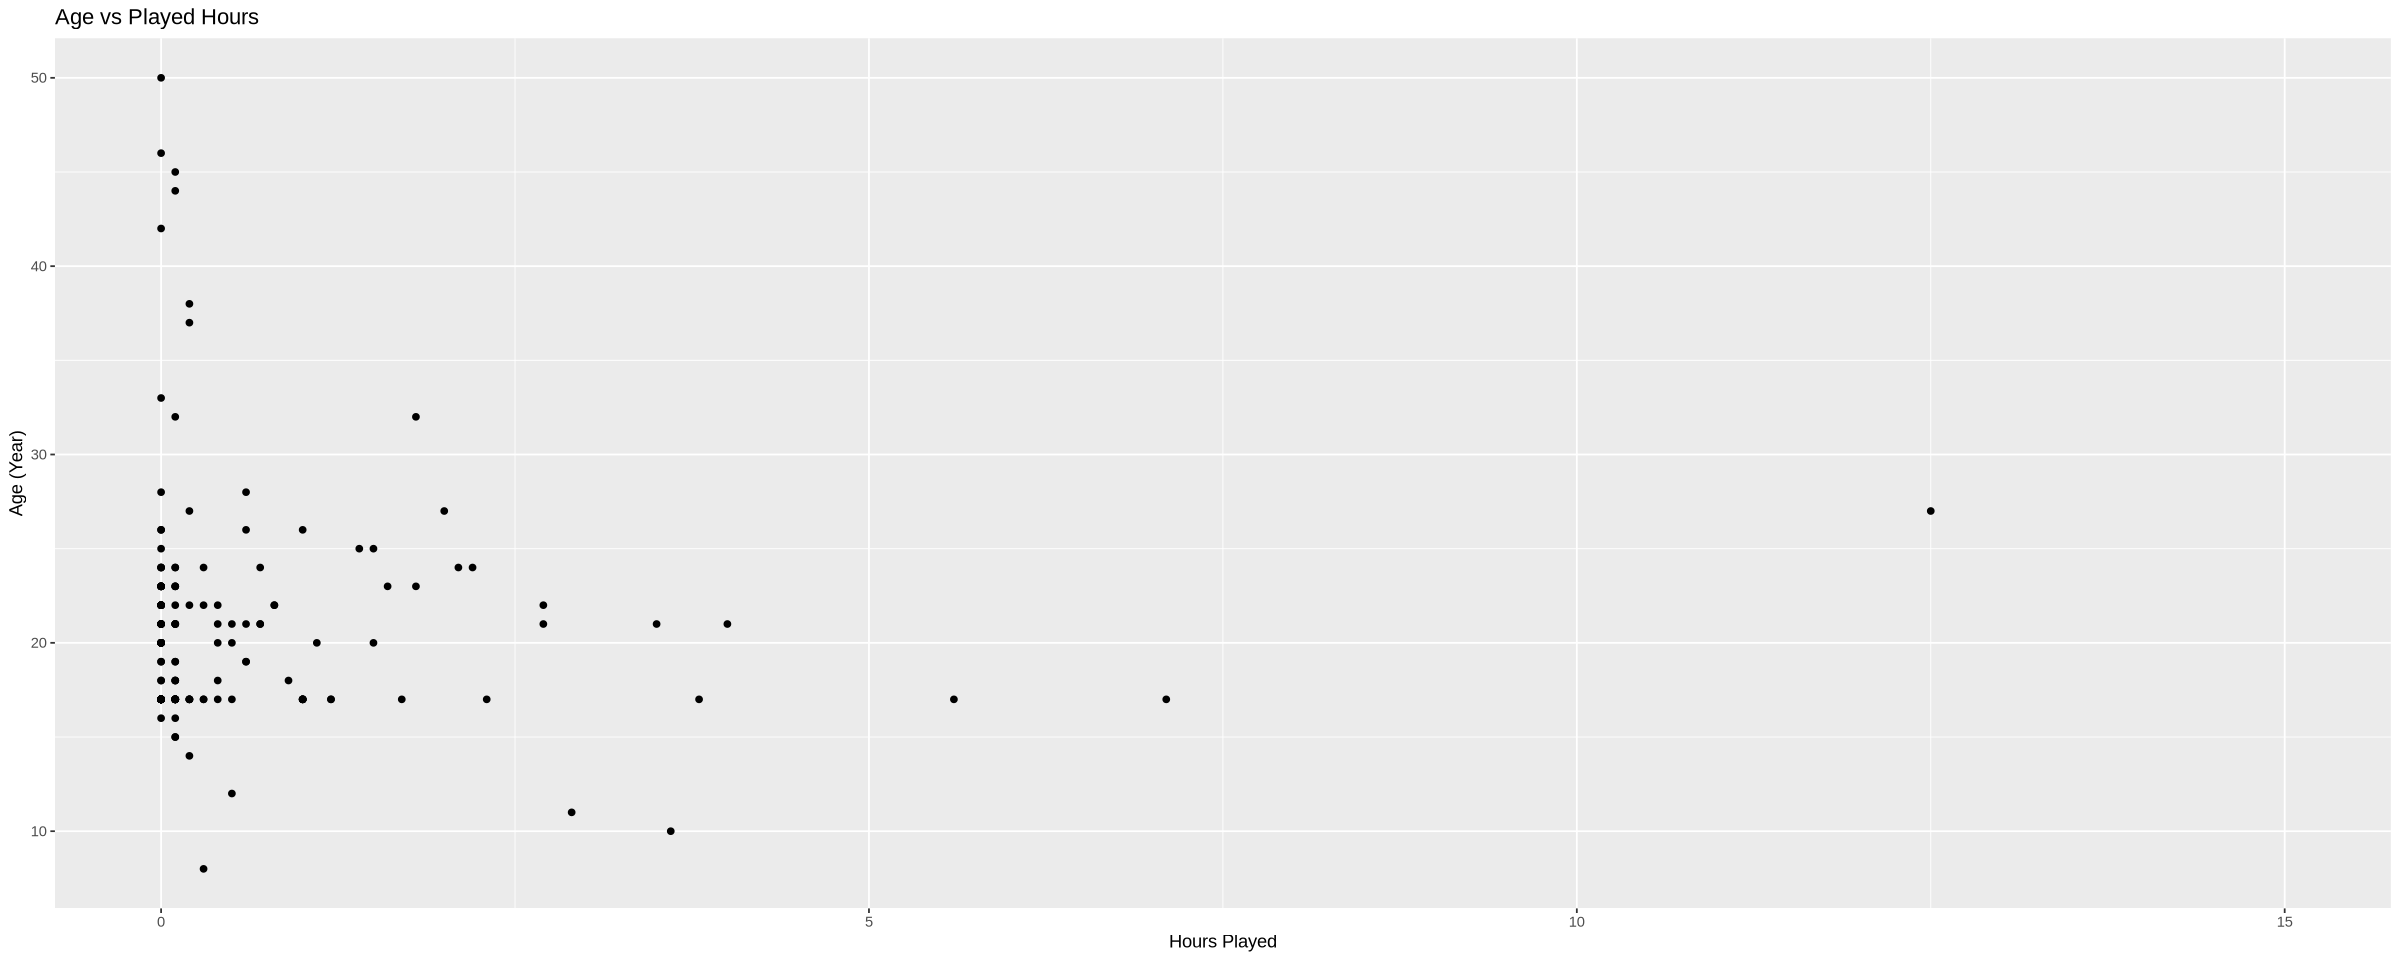

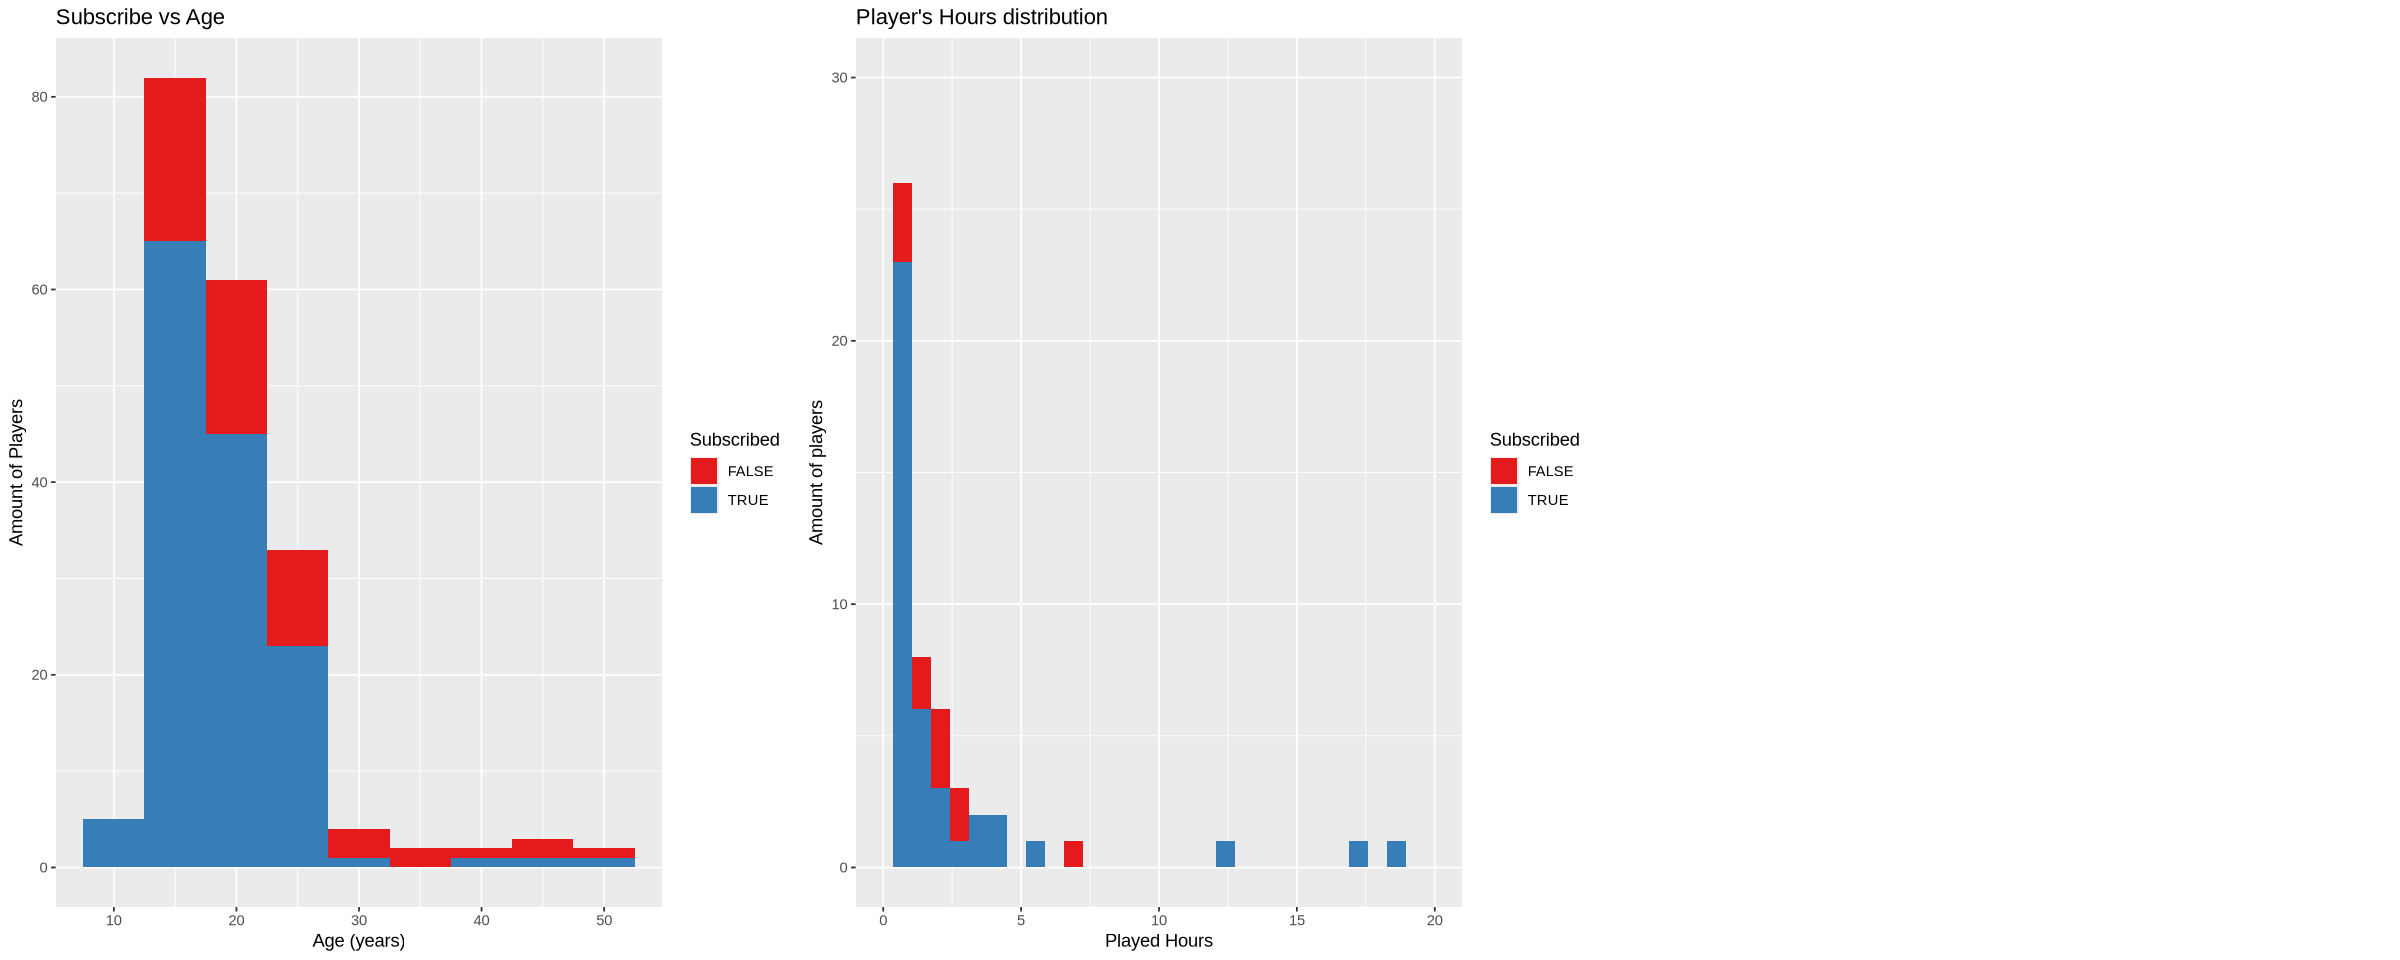

In [3]:
options(repr.plot.width = 20, repr.plot.height = 8) 

players_point <- players |>
                 ggplot(aes(x = played_hours, y = age)) +
                 geom_point() +  
                 xlim(0, 15) +
                 scale_fill_brewer(palette = "Set1") +
                 labs(title = "Age vs Played Hours",
                 x = "Hours Played",
                 y = "Age (Year)")


players_age <-   players |>
                 arrange(age) |>
                 ggplot(aes(x = age, fill = subscribe)) +
                 geom_histogram(binwidth =5) +  
                 scale_fill_brewer(palette = "Set1") +
                 labs(title = "Subscribe vs Age",
                 x = "Age (years)",
                 y = "Amount of Players",
                 fill = "Subscribed")
                 
players_hours <- players |>
                 ggplot(aes(x = played_hours, fill = subscribe)) +
                 geom_histogram() + 
                 xlim(0, 20) +
                 ylim(0, 30) +
                 scale_fill_brewer(palette = "Set1") +
                 labs(title = "Player's Hours distribution",
                 x = "Played Hours",
                 y = "Amount of players",
                 fill = "Subscribed")
players_point
plot_grid(players_age, players_hours, ncol = 3)


From the graphs, we can see that there are not a lot of players that play more than 10 hours. This has cause a huge empty gap in the last graph. We can also see that the majority of the players are between the age of 10 to 25 years old.

Because of the small number of players that have played upwards of 10 hours, it may be difficult to establish a correlation bewteen subscription and played hours. Similarly, there are not many players above the age of 30. 

There are also more subscribed players than unsubscribed players, which could also cause the model to predict that the player is subscribed more often. All of the players who have played upwards of 10 hours are subscribed, which could lead the model to believe that any one who has 10+ hours will subscribe to the newletter. Similarly, with age, because there are very few players over the age of 30, this could confuse the model.

# Discussion
We can use k-nearest-neighbours classification to predict the player's experience, since subscribe is a categorical variable.
It is assumed that players in the same class have the similar stats and appear in the same general area of the graph.
One potential issue is that we might not be using enough predictors, or the predictors chosen are not correlated to the player's experience.


The data is going to be split into two sets, with 75% as the training set and 25% as the testing set. The training data will be spilt into 5 more sets, so the model can be trained with cross validation. 
We ar going to compare the metrics of the models with different k values and select the one with the best accuracy.


In [4]:
set.seed(12345)
# clean data
players_clean <- players |>
select(age, played_hours, subscribe) |>
filter(!is.na(age) & !is.na(played_hours) & !is.na(subscribe) )|>
mutate(subscribe = as.factor(subscribe)) 


In [5]:
# split
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

players_vfold <- vfold_cv(data = players_training, v = 5, strata = subscribe)


In [6]:
# recipes and workflow
players_recipe <- recipe(subscribe ~ . , data = players_training) |>
                       step_scale(all_predictors()) |>
                       step_center(all_predictors())

players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

player_workflow_tune <- workflow() |>
add_recipe(players_recipe) |>
add_model(players_tune)

In [7]:
# find best k
gridvals <- tibble(neighbors = seq(from = 1, to = 25, by = 2))

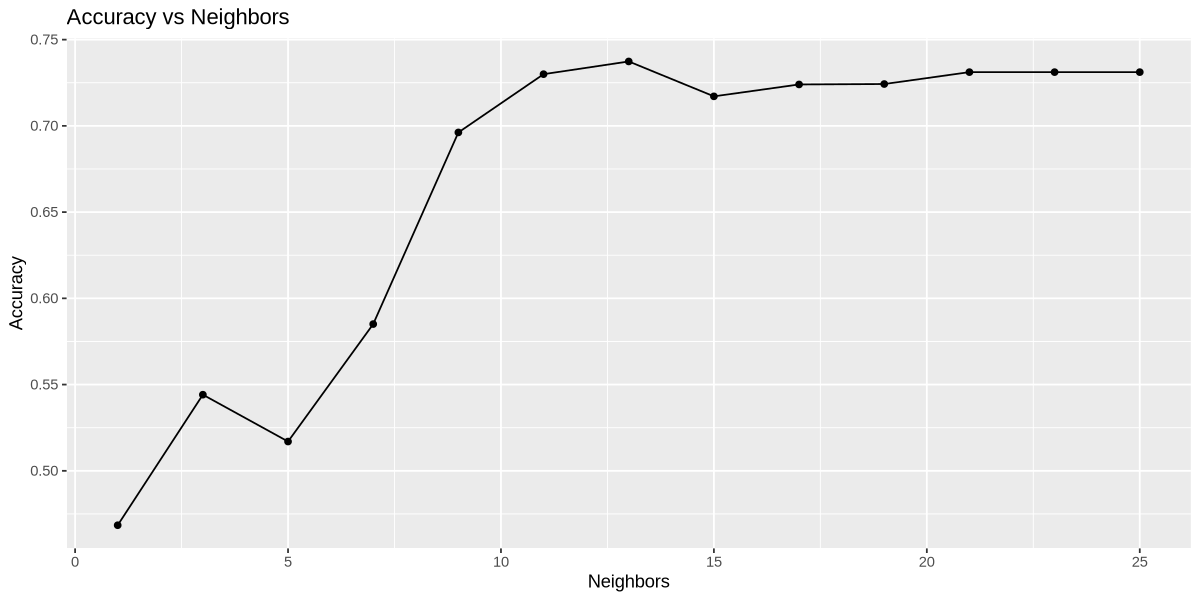

In [8]:

# compare data
players_tune <- player_workflow_tune |>
tune_grid(resamples = players_vfold, grid = gridvals)

# select best accuracy
tune_accuracy <- collect_metrics(players_tune) |>
filter(.metric == "accuracy") 


# visualization
options(repr.plot.width = 10, repr.plot.height = 5)
accuracy_vs_k <- ggplot(tune_accuracy, aes(x = neighbors, y = mean))+
geom_point() +
geom_line() +
labs(x = "Neighbors",
     y = "Accuracy") +
ggtitle("Accuracy vs Neighbors")
accuracy_vs_k

In [9]:
# select best
best_k <- tune_accuracy |>
arrange(desc(mean))  |>
select(neighbors) |>
slice(1) |>
pull()
     

# best k classification
players_model <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
set_engine("kknn") |>
set_mode("classification")

player_workflow_best <- workflow() |>
add_recipe(players_recipe) |>
add_model(players_model)

          Truth
Prediction FALSE TRUE
     FALSE     2    4
     TRUE     11   32

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6938776
kap,binary,0.0516129


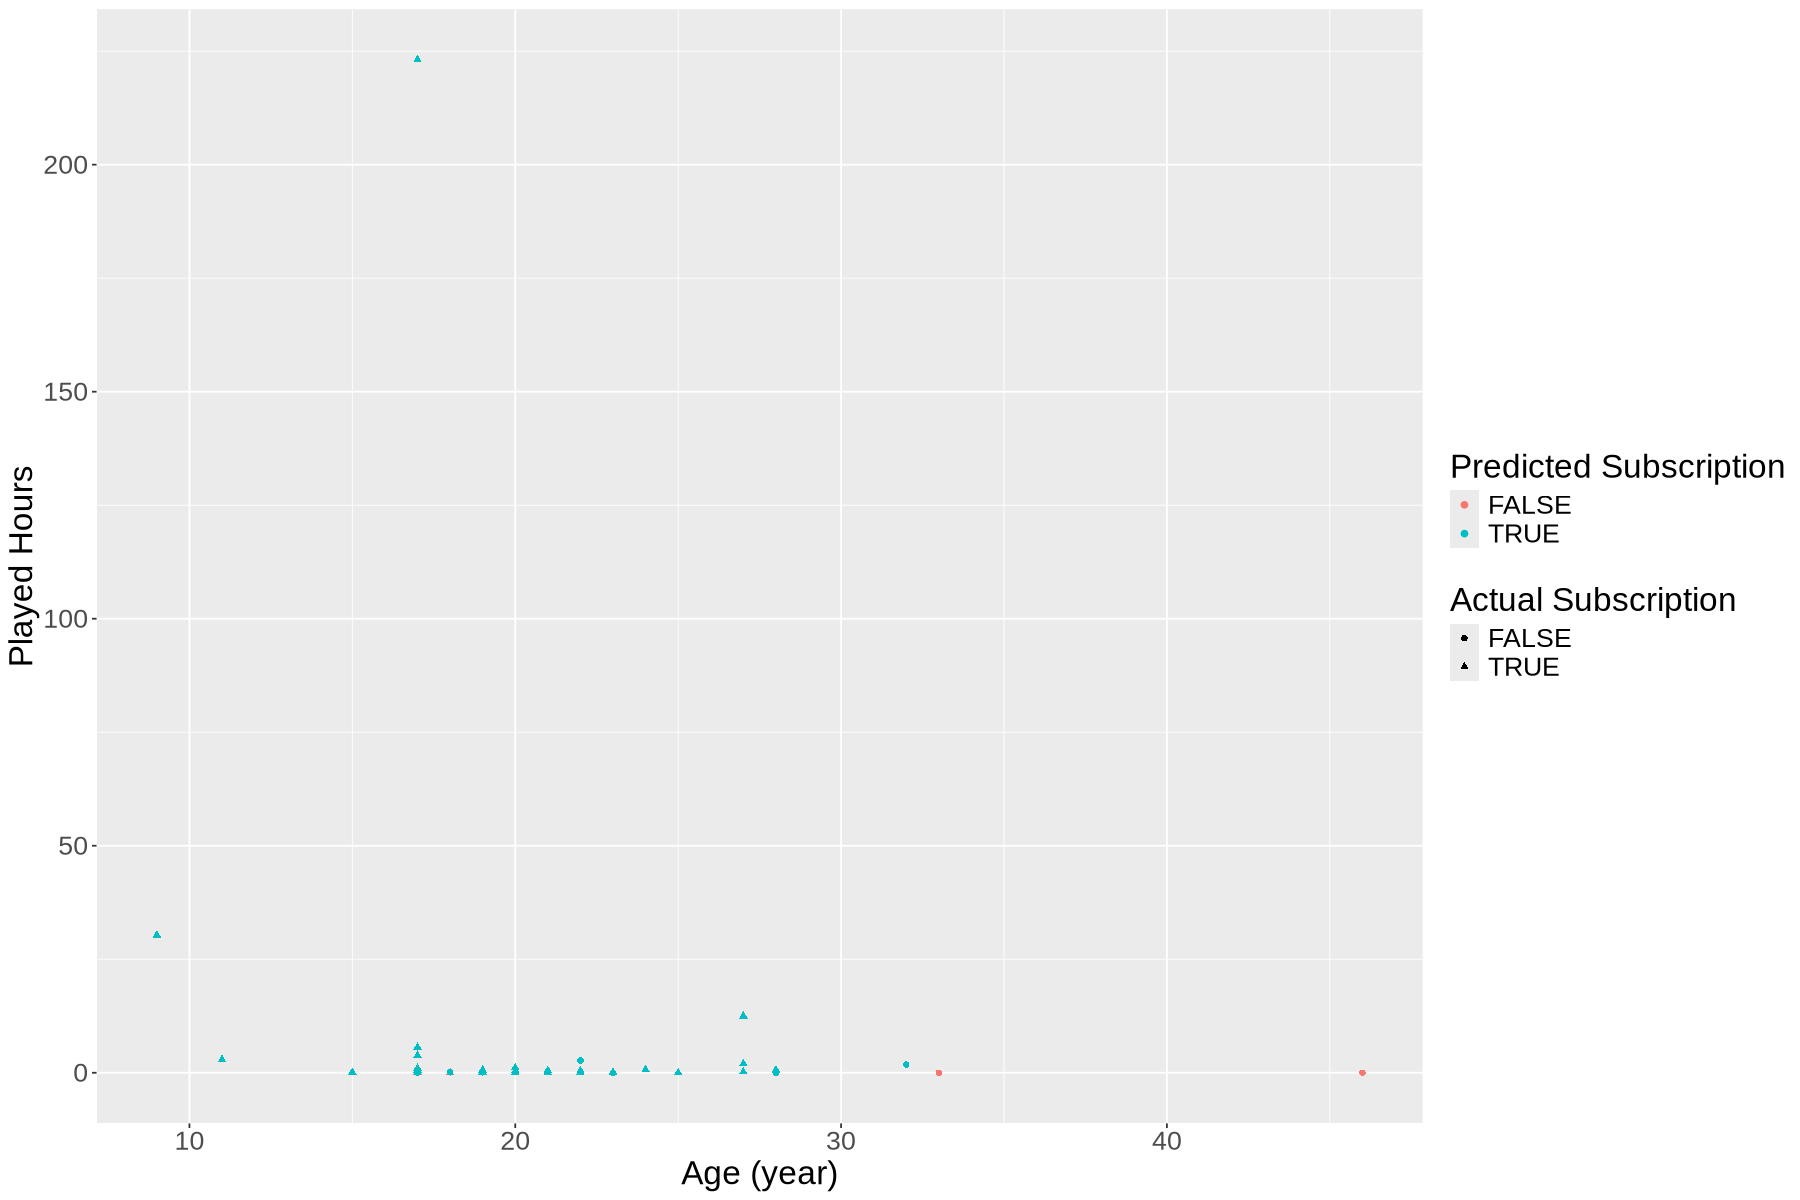

In [10]:

# test classification model
player_fit <- fit(player_workflow_best, players_training)

player_prediction <- player_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) 

options(repr.plot.width = 15, repr.plot.height = 10) 
prediction_plot <-player_prediction|>
ggplot(aes(x =age, y =played_hours, color = .pred_class, shape = subscribe)) +
geom_point()+
labs(x = "Age (year)",
     y = "Played Hours",
    color = "Predicted Subscription",
    shape = "Actual Subscription") +
    theme(text = element_text(size = 20))
prediction_plot

conf_mat(player_prediction, truth = subscribe, estimate = .pred_class)

player_summary <- player_prediction |>
metrics(truth = subscribe, estimate = .pred_class)
player_summary

# Discussion of Results
As can be seen in the graph above, the model predicted true subscription for the majority of the test data. The only players that the model predicted would not subscribe were 2/3 of those over the age of 30. This is likely because the ratio of subscribed to unsubscribed players changes drastically at this age point. Players younger than 30 are more likely to be subscribed than unsubscribed based on the original dataset. However, at around 30 years the number of players drops drastically which makes it easier for the ratio of subscribed:unsubscribed to be skewed. This is likely why the model has predicted that 2/indicates that there is a correlation, albeit a weak one

The model predicted that every player under the age of 30, regardless of their played hours would subscribe to the newsletter. From first glance it is easy to see that this is not a very accurate result. The original dataset shows that, though there is an obvious disparity, there are still a number of participants of all ages that are not subscribed. It is likely the model got confused by the large amount of players under age 30 that are in fact subscribed, compared to the much smaller number that are not. Because of this difference, the model has inaccurately predicted that all players under 30 will subscribe. 

From the original graphs, it seems that there is not much of a correlation between played hours and subscription to the newsletter. There are no obvious patterns that connect the two variables. In the original "Player's Hours Distribution" graph, the majority of the time ranges have both players that are subscribed and players who are not. Within each of these ranges, though, there are a similar number of players who are unsubscribed, despite varying numbers of players who are subscribed. This indicates that there is a correlation, albeit a weak one, between the variables. 

Additionally, in the original graph, 100% of all players with over 10 hours of play time are subscribed to the newsletter. This could be indicative of a tendency for players with a high number of hours to subscribe, which would be useful information for those conducting the study. However, there are very few players in this range, which means that the data is unreliable and likely to confuse the prediction model. The results show that all players with a substantial number of played hours are predicted to be subscribed, as expected. Despite the fact that there was not a lot of data for players with over 10 hours, the researchers could focus on players with a larger number of hours for potential subscribers. 

The original "Subscribe vs Age" graph shows that most players between ages 10 to 30 are subscribed, though there are still players in most of these age ranges that are not subscribed. Surprisingly, the original graph shows that all players under the age of 10 are subscribed. Again, this is a small dataset so there are not many players in this age range, which could skew the results. However, assuming that this is typically the case, the researchers can use this information to target players in this age range for their newsletter. The prediction graph demonstrated this same ratio, which is to be expected, though it is important to keep in mind the small dataset. 

# In Summary...

# We found:
The prediction model was not very accurate. Based off the results of this alone, it would be difficult to determine any correlation between the variables, except that 2/3 players over age 30 are subscribed. Played hours was entirely irrelevant and age had little influence on the results. 

# This is surprising because: 
The original dataset showed different patterns, such as the correlation between a higher number of played hours and subscription rate. The prediction model did not show the same results as the original data. 

# The impacts are:
The research team can use the visualizations to determine target audiences for the newsletter and not waste their time on demograhpics that are not likely to subscribe. They should avoid those over 30 and focus on players under 10 years of age or with more than 10 hours played.

# This leads to the questions:
Would a larger dataset change these results drastically?

What is causing players under 10 to subscribe? Are parents involved? Do they agree without knowing? 

Why are players over 30 less likely to subscribe? Is there a way to fix this? 

What other variables have a stronger correlation to subscription?